In [2]:
import sys
import os
import pathlib
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 250)
import matplotlib.pyplot as plt
import h5py
import scipy
import scipy.stats as sp
from scipy import stats
import warnings
# for filename in os.listdir(os.getcwd()):
import shutil
from pathlib import Path
from collections import defaultdict
from datetime import datetime, date
from operator import itemgetter
from inspect import cleandoc
from typing import TypeVar, Callable, Union, overload, NamedTuple, Iterable, Tuple, List, Dict, TextIO
from typing_extensions import Literal
from collections import defaultdict
#path = "../models"
#if not path in sys.path:
#    sys.path.append(path)
#from pathlib import PurePosixPath
#import dishpill_models.reader as reader

warnings.filterwarnings('ignore')
path = "../pydishbrain/dishpill-literate-python-pydishbrain-Literate/pydishbrain/Literate"
if not path in sys.path:
    sys.path.append(path)
%reload_ext autoreload
%autoreload 1
import raw_to_h5
import pingouin as pg

ModuleNotFoundError: No module named 'raw_to_h5'

In [3]:
def h5_to_pd(filename):
    f = h5py.File(filename, 'r')
    maps = np.array(f['mapping'])
    maps=pd.DataFrame(maps.tolist())
    #print(len(maps))
    maps.columns=['channel', 'electrode', 'x', 'y']
    proc0 = f['proc0']
    #print(len(proc0))
    ar = np.array(proc0['spikeTimes'])
    #print(len(ar))
    spikes=pd.DataFrame(ar.tolist())
    #print(len(spikes))
    spikes.columns=['frame', 'channel', 'amplitude']
    df = spikes.merge(maps, on = 'channel', how = 'left')
    df['frame'] = df['frame'] - df['frame'].iloc[0]
    return df

In [4]:
def remove_prefix(s, p):
    if s.startswith(p):
        return s[len(p):]
    else:
        return s

In [5]:
def grabTag(name):
    name = name.rsplit('.', 1)[0]
    name = name + '.spikes.bin'
    print(name)
    chip = New_tags_filenames[name]
    tagName = chip.get('tag')
    return tagName

In [6]:
Corrdf = pd.read_pickle('spikedatacorrsall100ms.pkl')
Corrdf['cell_type']= "Mouse"
Corrdf['cell_type']= np.where((Corrdf['tag'].str.contains('GFP', case = False) | Corrdf['tag'].str.contains('ngn2', case = False) |
                        (Corrdf['tag'].str.contains('tdt', case = False))), "Human", Corrdf['cell_type'])

In [33]:
expCorrdf= Corrdf[Corrdf.group  != 3]
restCorrdf= Corrdf[Corrdf.group  == 3]
cutmeancorr = Corrdf[Corrdf.minute  > 0]

In [34]:
cutmeancorr['group'] = np.where((cutmeancorr['group'] == 0) | (cutmeancorr[("group")] == 2), 1, cutmeancorr['group'])
cutmeancorr['minute'] = np.where((cutmeancorr['session'] == '3'), (cutmeancorr['minute']+10), cutmeancorr['minute'])
cutmeancorr = cutmeancorr.groupby(['cell_type', 'group', 'chip_id', 'date', 'minute']).mean()
cutmeancorr = cutmeancorr.reset_index()
cutmeancorr = cutmeancorr.pivot(index = ['cell_type', 'chip_id','date', 'minute', "second"], columns='group')
pivcutmeancorrtdf = cutmeancorr.reset_index()


In [35]:
pivcutmeancorrtdf['%changeEvents'] = ((pivcutmeancorrtdf[(       'events',  1)] - pivcutmeancorrtdf[(       'events',  3)])
                                      / pivcutmeancorrtdf[(       'events',  3)]) * 100

In [36]:
pivcutmeancorrtdf['normEvents'] = (pivcutmeancorrtdf[(       'events',  1)] - 
                                    pivcutmeancorrtdf[(       'events',  3)])                          

In [37]:
pivcutmeancorrtdf=pivcutmeancorrtdf.drop(columns=[('NormHzSensory',  1),
            ('NormHzSensory',  3),
            ( 'NormHzmotor1',  1),
            ( 'NormHzmotor1',  3),
            ( 'NormHzmotor2',  1),
            ( 'NormHzmotor2',  3),])

In [38]:
d = {'cell_type': pivcutmeancorrtdf[(   'cell_type', '')], 'minute': pivcutmeancorrtdf[(   'minute', '')],
     'chip_id': pivcutmeancorrtdf[(   'chip_id', '')], 'date': pivcutmeancorrtdf[(   'date', '')], 
     'second': pivcutmeancorrtdf[(   'second', '')], 'normEvents': pivcutmeancorrtdf[('normEvents', '')]}
changeevents = pd.DataFrame(data=d)
changeevents[:200]

,cell_type,minute,chip_id,date,second,normEvents
0,Human,1,11570,2021-06-23,600.559464,NaN
1,Human,1,11570,2021-06-23,601.722056,NaN
2,Human,2,11570,2021-06-23,1198.822534,NaN
3,Human,2,11570,2021-06-23,1200.298333,NaN
4,Human,3,11570,2021-06-23,1798.959668,NaN
5,Human,3,11570,2021-06-23,1800.000000,NaN
6,Human,4,11570,2021-06-23,2400.000000,NaN
7,Human,4,11570,2021-06-23,2401.118584,NaN
8,Human,5,11570,2021-06-23,3000.000000,NaN
9,Human,5,11570,2021-06-23,3000.670901,NaN


In [39]:
changeevents = changeevents.groupby(['cell_type', 'chip_id', 'date', 'minute']).mean()
changeevents = changeevents.reset_index()

In [40]:
cutmeancorr = Corrdf
cutmeancorr['group'] = np.where((cutmeancorr['group'] == 0) | (cutmeancorr[("group")] == 2), 1, cutmeancorr['group'])
cutmeancorr['group'] = np.where((cutmeancorr['group'] == 3) & (cutmeancorr['minute'] > 10), 4, cutmeancorr['group'])
cutmeancorr = cutmeancorr[cutmeancorr.group  != 4]

cutmeancorr['normevents'] = cutmeancorr['events'] - (((cutmeancorr['NormHzSensory']) + (cutmeancorr['NormHzmotor1']) + (cutmeancorr['NormHzmotor2']))/3)


meancorr = cutmeancorr.groupby(['cell_type', 'chip_id', 'date', 'session', 'minute']).mean()
meancorr = meancorr.reset_index()
expmeancorr = meancorr[meancorr.group  != 3]
restmeancorr = meancorr[meancorr.group  == 3]

In [41]:
d = {'group': meancorr[('group')], 'cell_type': meancorr[('cell_type')], 'minute': meancorr[('minute')], 'session': meancorr[('session')],
     'chip_id': meancorr[('chip_id')], 'date': meancorr[('date')], 
     'pmotor1Corr': meancorr[('pmotor1Corr')], 'pmotor2Corr': meancorr[('pmotor2Corr')]}
longmeancorr = pd.DataFrame(data=d)
longmeancorr[:200]

,group,cell_type,minute,session,chip_id,date,pmotor1Corr,pmotor2Corr
0,1.0,Human,0,0,11570,2021-06-23,0.982,0.970
1,1.0,Human,1,0,11570,2021-06-23,0.175,0.154
2,1.0,Human,2,0,11570,2021-06-23,0.030,0.069
3,1.0,Human,3,0,11570,2021-06-23,0.855,0.935
4,1.0,Human,4,0,11570,2021-06-23,0.984,0.990
5,1.0,Human,5,0,11570,2021-06-23,0.023,0.022
6,1.0,Human,6,0,11570,2021-06-23,0.970,0.979
7,1.0,Human,7,0,11570,2021-06-23,0.028,0.066
8,1.0,Human,8,0,11570,2021-06-23,0.066,0.043
9,1.0,Human,9,0,11570,2021-06-23,0.620,0.843


In [42]:
longmeancorr = pd.melt(longmeancorr, id_vars=['group', 'cell_type', 'chip_id', 'date', 'session', 'minute'])

In [43]:
pg.pairwise_corr(expmeancorr, method='spearman', columns=['NormHzmotor1', 'NormHzmotor2', 'NormHzSensory']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,NormHzmotor1,NormHzmotor2,spearman,two-sided,7417,0.821,"[0.81, 0.83]",0.674,0.673,1.159,0.0,1.0
1,NormHzmotor1,NormHzSensory,spearman,two-sided,7417,0.788,"[0.78, 0.8]",0.621,0.621,1.067,0.0,1.0
2,NormHzmotor2,NormHzSensory,spearman,two-sided,7417,0.711,"[0.7, 0.72]",0.506,0.506,0.889,0.0,1.0


In [44]:
restmeancorr['ZNormHzSensory'] = stats.zscore(restmeancorr['NormHzSensory'])
restmeancorr['ZNormHzSensory'] = restmeancorr['ZNormHzSensory'].abs()
fil_restmeancorr = restmeancorr[restmeancorr.ZNormHzSensory  <= 3]
fil_restmeancorr['ZNormHzmotor1'] = stats.zscore(fil_restmeancorr['NormHzmotor1'])
fil_restmeancorr['ZNormHzmotor1'] = fil_restmeancorr['ZNormHzmotor1'].abs()
fil_restmeancorr = fil_restmeancorr[fil_restmeancorr.ZNormHzmotor1  <= 3]
fil_restmeancorr['ZNormHzmotor2'] = stats.zscore(fil_restmeancorr['NormHzmotor2'])
fil_restmeancorr['ZNormHzmotor2'] = fil_restmeancorr['ZNormHzmotor2'].abs()
fil_restmeancorr = fil_restmeancorr[fil_restmeancorr.ZNormHzmotor1  <= 3]

In [45]:
expmeancorr['ZNormHzSensory'] = stats.zscore(expmeancorr['NormHzSensory'])
expmeancorr['ZNormHzSensory'] = expmeancorr['ZNormHzSensory'].abs()
fil_expmeancorr = expmeancorr[expmeancorr.ZNormHzSensory  <= 3]
fil_expmeancorr['ZNormHzmotor1'] = stats.zscore(fil_expmeancorr['NormHzmotor1'])
fil_expmeancorr['ZNormHzmotor1'] = fil_expmeancorr['ZNormHzmotor1'].abs()
fil_expmeancorr = fil_expmeancorr[fil_expmeancorr.ZNormHzmotor1  <= 3]
fil_expmeancorr['ZNormHzmotor2'] = stats.zscore(fil_expmeancorr['NormHzmotor2'])
fil_expmeancorr['ZNormHzmotor2'] = fil_expmeancorr['ZNormHzmotor2'].abs()
fil_expmeancorr = fil_expmeancorr[fil_expmeancorr.ZNormHzmotor1  <= 3]

In [46]:
fil_restmeancorr['Sensory']= (fil_restmeancorr['NormHzSensory']*626)
fil_restmeancorr['M1']= (fil_restmeancorr['NormHzmotor1']*198)
fil_restmeancorr['M2']= (fil_restmeancorr['NormHzmotor2']*200)
fil_expmeancorr['Sensory']= (fil_expmeancorr['NormHzSensory']*626)
fil_expmeancorr['M1']= (fil_expmeancorr['NormHzmotor1']*198)
fil_expmeancorr['M2']= (fil_expmeancorr['NormHzmotor2']*200)

In [47]:
count = fil_expmeancorr.groupby(['chip_id', 'date', 'session']).mean()
print(len(count))

358


In [48]:
count = fil_restmeancorr.groupby(['chip_id', 'date', 'session']).mean()
print(len(count))

221


In [49]:
pg.pairwise_corr(fil_expmeancorr, method='pearson', columns=['Sensory', 'M1', 'M2']).round(4)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Sensory,M1,pearson,two-sided,7234,0.8348,"[0.83, 0.84]",0.6969,0.6968,1.2038,0.0,inf,1.0
1,Sensory,M2,pearson,two-sided,7234,0.8291,"[0.82, 0.84]",0.6874,0.6873,1.1853,0.0,inf,1.0
2,M1,M2,pearson,two-sided,7234,0.8246,"[0.82, 0.83]",0.6800,0.6799,1.1711,0.0,inf,1.0


In [50]:
pg.pairwise_corr(fil_restmeancorr, method='pearson', columns=['Sensory', 'M1', 'M2']).round(4)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Sensory,M1,pearson,two-sided,2396,0.8924,"[0.88, 0.9]",0.7963,0.7962,1.4335,0.0,inf,1.0
1,Sensory,M2,pearson,two-sided,2396,0.8772,"[0.87, 0.89]",0.7695,0.7693,1.3636,0.0,inf,1.0
2,M1,M2,pearson,two-sided,2396,0.8543,"[0.84, 0.86]",0.7299,0.7297,1.2720,0.0,inf,1.0


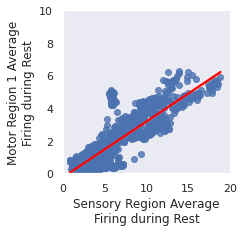

In [51]:
x = fil_restmeancorr['Sensory']
y = fil_restmeancorr['M1']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, line_kws={"color": "red"})
sns.set(style="darkgrid")
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
ax.set_ylabel('Motor Region 1 Average\nFiring during Rest')
ax.set_xlabel('Sensory Region Average\nFiring during Rest')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/Motor_Region_1_Average_Firing_per_Electrode_during_Rest.pdf', bbox_inches='tight') 

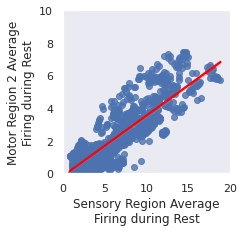

In [52]:
x = fil_restmeancorr['Sensory']
y = fil_restmeancorr['M2']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, line_kws={"color": "red"})
sns.set(style="darkgrid")
ax.set_xlim([0, 20])a
ax.set_ylim([0, 10])
ax.set_ylabel('Motor Region 2 Average\nFiring during Rest')
ax.set_xlabel('Sensory Region Average\nFiring during Rest')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/Motor_Region_2_Average_Firing_per_Electrode_during_Rest.pdf', bbox_inches='tight') 

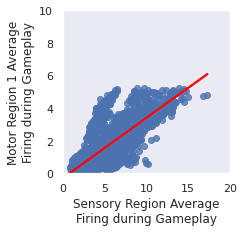

In [53]:
x = fil_expmeancorr['Sensory']
y = fil_expmeancorr['M1']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, line_kws={"color": "red"})
sns.set(style="darkgrid")
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
ax.set_ylabel('Motor Region 1 Average\nFiring during Gameplay')
ax.set_xlabel('Sensory Region Average\nFiring during Gameplay')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/mMotor_Region_1_Average_Firing_per_Electrode_during_Gameplay.pdf', bbox_inches='tight') 

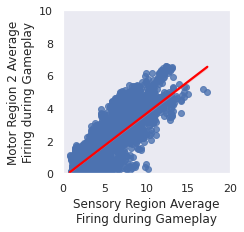

In [54]:
x = fil_expmeancorr['Sensory']
y = fil_expmeancorr['M2']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, line_kws={"color": "red"})
sns.set(style="darkgrid")
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
ax.set_ylabel('Motor Region 2 Average\nFiring during Gameplay')
ax.set_xlabel('Sensory Region Average\nFiring during Gameplay')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/mMotor_Region_2_Average_Firing_per_Electrode_during_Gameplay.pdf', bbox_inches='tight') 

In [55]:
pg.pairwise_corr(fil_expmeancorr, method='spearman', columns=['NormHzmotor1', 'NormHzmotor2', 'NormHzSensory']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,NormHzmotor1,NormHzmotor2,spearman,two-sided,7234,0.808,"[0.8, 0.82]",0.654,0.653,1.122,0.0,1.0
1,NormHzmotor1,NormHzSensory,spearman,two-sided,7234,0.777,"[0.77, 0.79]",0.604,0.603,1.038,0.0,1.0
2,NormHzmotor2,NormHzSensory,spearman,two-sided,7234,0.696,"[0.68, 0.71]",0.484,0.484,0.859,0.0,1.0


In [56]:
pg.pairwise_corr(fil_restmeancorr, method='spearman', columns=['NormHzmotor1', 'NormHzmotor2', 'NormHzSensory']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,NormHzmotor1,NormHzmotor2,spearman,two-sided,2396,0.811,"[0.8, 0.82]",0.658,0.658,1.130,0.0,1.0
1,NormHzmotor1,NormHzSensory,spearman,two-sided,2396,0.755,"[0.74, 0.77]",0.570,0.570,0.985,0.0,1.0
2,NormHzmotor2,NormHzSensory,spearman,two-sided,2396,0.700,"[0.68, 0.72]",0.489,0.489,0.866,0.0,1.0


In [57]:
fil_meancorr = pd.concat([fil_expmeancorr, fil_restmeancorr], join = 'inner', axis = 0)

In [59]:
d = {'group': fil_meancorr[('group')], 'cell_type': fil_meancorr[('cell_type')], 'minute': fil_meancorr[('minute')], 'session': meancorr[('session')],
     'chip_id': fil_meancorr[('chip_id')], 'date': fil_meancorr[('date')], 
     'pmotor1Corr': fil_meancorr[('pmotor1Corr')], 'pmotor2Corr': fil_meancorr[('pmotor2Corr')]}
longmeancorr = pd.DataFrame(data=d)


In [60]:
longmeancorr = pd.melt(longmeancorr, id_vars=['group', 'cell_type', 'chip_id', 'date', 'session', 'minute'])

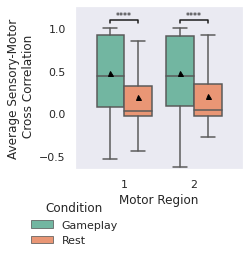

In [61]:
ax = sns.boxplot(x=longmeancorr['variable'], y=longmeancorr['value'], hue = longmeancorr['group'], palette="Set2", 
                 showfliers=False, showmeans = True, 
                 meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
ax.set(xlabel='Motor Region', ylabel='Average Sensory-Motor\n Cross Correlation')
L = plt.legend(loc='lower left', bbox_to_anchor=(-0.3, -0.5), title = "Condition", borderaxespad=0.1, frameon=False)
L.get_texts()[0].set_text('Gameplay')
L.get_texts()[1].set_text('Rest')
ax.set_xticklabels(("1", "2"))
sns.set(style="darkgrid")
ax.grid(False)
y, h, col = 1.05, 0.04, 'k'
x00, x01 = -.2, .2
x10, x11 = .8, 1.2

#Plot t-test between groups
plt.plot([x00, x00, x01, x01], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text(((x00 + x01)/2), y+ h, "****", ha='center', va='bottom', color=col, fontsize=8)
plt.plot([x10, x10, x11, x11], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text(((x10 + x11)/2), y+ h, "****", ha='center', va='bottom', color=col, fontsize=8)


ax.set_ylim([-0.65, 1.25])
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/average_sensory-motor_cross-rank_r.pdf', bbox_inches='tight')
plt.show()

In [62]:
hc_t = stats.ttest_ind(fil_expmeancorr['pmotor1Corr'], fil_restmeancorr['pmotor1Corr'])
hc_t

Ttest_indResult(statistic=30.399616471785677, pvalue=6.614043766913307e-194)

In [63]:
hc_t = stats.ttest_ind(fil_expmeancorr['pmotor2Corr'], fil_restmeancorr['pmotor2Corr'])
hc_t

Ttest_indResult(statistic=29.762171249395127, pvalue=2.7602647066314713e-186)

In [64]:
pg.pairwise_corr(fil_expmeancorr, method='pearson', columns=['M1', 'M2']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,M1,M2,pearson,two-sided,7234,0.825,"[0.82, 0.83]",0.68,0.68,1.171,0.0,inf,1.0


In [65]:
pg.pairwise_corr(fil_expmeancorr, method='pearson', columns=['NormHzmotor1', 'NormHzmotor2']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,NormHzmotor1,NormHzmotor2,pearson,two-sided,7234,0.825,"[0.82, 0.83]",0.68,0.68,1.171,0.0,inf,1.0


In [66]:
pg.pairwise_corr(fil_expmeancorr, method='spearman', columns=['NormHzmotor1', 'NormHzmotor2']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,NormHzmotor1,NormHzmotor2,spearman,two-sided,7234,0.808,"[0.8, 0.82]",0.654,0.653,1.122,0.0,1.0


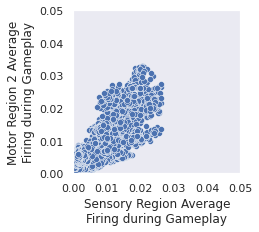

In [67]:
x = fil_expmeancorr['NormHzmotor1']
y = fil_expmeancorr['NormHzmotor2']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.scatterplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
ax.set_xlim([0, 0.05])
ax.set_ylim([0, 0.05])
ax.set_ylabel('Motor Region 2 Average\nFiring during Gameplay')
ax.set_xlabel('Sensory Region Average\nFiring during Gameplay')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})

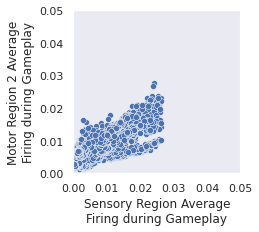

In [68]:
x = fil_expmeancorr['NormHzmotor1']
y = fil_expmeancorr['NormHzSensory']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.scatterplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
ax.set_xlim([0, 0.05])
ax.set_ylim([0, 0.05])
ax.set_ylabel('Motor Region 2 Average\nFiring during Gameplay')
ax.set_xlabel('Sensory Region Average\nFiring during Gameplay')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})

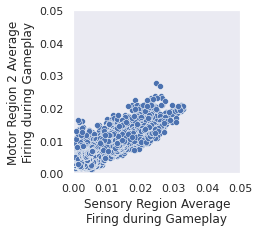

In [69]:
x = fil_expmeancorr['NormHzmotor2']
y = fil_expmeancorr['NormHzSensory']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.scatterplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
ax.set_xlim([0, 0.05])
ax.set_ylim([0, 0.05])
ax.set_ylabel('Motor Region 2 Average\nFiring during Gameplay')
ax.set_xlabel('Sensory Region Average\nFiring during Gameplay')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})

In [70]:
import statsmodels.formula.api as smf
reg = smf.ols('NormHzmotor2 ~ NormHzmotor1', data=fil_expmeancorr).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NormHzmotor2   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:56:45   Log-Likelihood:                 30802.
No. Observations:                7234   AIC:                        -6.160e+04
Df Residuals:                    7232   BIC:                        -6.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0014   5.92e-05     23.468      0.000       0.001       0.002
NormHzmotor1     0.8740      0.007    123.969      0.000       0.860       0.888
==============================================================================
Omnibus:                     1174.674   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4063.758
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                       6.300   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

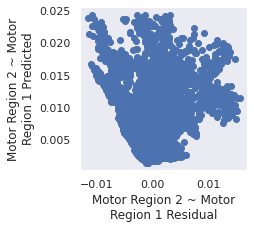

In [71]:
import statsmodels.formula.api as smf
reg = smf.ols('NormHzmotor2 ~ NormHzmotor1', data=fil_expmeancorr).fit()
reg.summary()
pred_val = reg.fittedvalues.copy()
true_val = fil_expmeancorr['NormHzmotor2'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(3,3))
sns.set(style="darkgrid")
ax.set_ylabel('Motor Region 2 ~ Motor\nRegion 1 Predicted')
ax.set_xlabel('Motor Region 2 ~ Motor\nRegion 1 Residual')
ax.grid(False)
_ = ax.scatter(residual, pred_val)
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/ResidualsM2M1.pdf', bbox_inches='tight') 

In [73]:
import statsmodels.stats.diagnostic as ssd
ssd.linear_rainbow(reg, frac=0.45, order_by=None, use_distance=False, center=None)

(1.6576967975135748, 1.3213630411383854e-50)

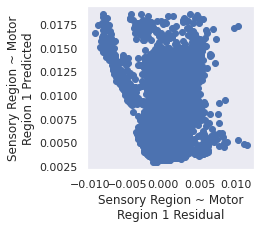

In [75]:
import statsmodels.formula.api as smf
reg = smf.ols('NormHzSensory ~ NormHzmotor1', data=fil_expmeancorr).fit()
reg.summary()
pred_val = reg.fittedvalues.copy()
true_val = fil_expmeancorr['NormHzSensory'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(3,3))
sns.set(style="darkgrid")
ax.set_ylabel('Sensory Region ~ Motor\nRegion 1 Predicted')
ax.set_xlabel('Sensory Region ~ Motor\nRegion 1 Residual')
ax.grid(False)
_ = ax.scatter(residual, pred_val)
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/ResidualsMSM1.pdf', bbox_inches='tight') 

In [77]:
import statsmodels.stats.diagnostic as ssd
ssd.linear_rainbow(reg, frac=0.45, order_by=None, use_distance=False, center=None)


(0.9827120411548453, 0.6994844142845621)

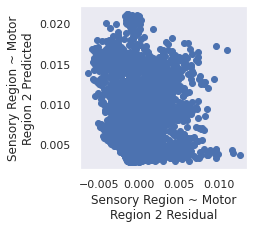

In [78]:
import statsmodels.formula.api as smf
reg = smf.ols('NormHzSensory ~ NormHzmotor2', data=fil_expmeancorr).fit()
reg.summary()
pred_val = reg.fittedvalues.copy()
true_val = fil_expmeancorr['NormHzSensory'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(3,3))
sns.set(style="darkgrid")
ax.set_ylabel('Sensory Region ~ Motor\nRegion 2 Predicted')
ax.set_xlabel('Sensory Region ~ Motor\nRegion 2 Residual')
ax.grid(False)
_ = ax.scatter(residual, pred_val)
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/ResidualsMSM2.pdf', bbox_inches='tight') 

In [79]:
import statsmodels.stats.diagnostic as ssd
ssd.linear_rainbow(reg, frac=0.45, order_by=None, use_distance=False, center=None)


(1.0397746571150994, 0.1220506442109472)

In [81]:
fil_expmeancorr['logsmotorsCorr'] = np.log10(fil_expmeancorr['smotorsCorr'])

In [82]:
expfirst = fil_expmeancorr[fil_expmeancorr.minute  < 5]
expsecond = fil_expmeancorr[fil_expmeancorr.minute  > 4]

In [83]:
pg.pairwise_corr(expfirst, method='pearson', columns=['minute', 'smotorsCorr']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,minute,smotorsCorr,pearson,two-sided,1705,-0.124,"[-0.17, -0.08]",0.015,0.014,-0.124,0.0,1.516e+04,0.999


In [84]:
pg.pairwise_corr(expsecond, method='pearson', columns=['minute', 'smotorsCorr']).round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,minute,smotorsCorr,pearson,two-sided,5529,-0.022,"[-0.05, 0.0]",0.0,0.0,-0.022,0.106,0.062,0.367


In [86]:
lm = pg.linear_regression(fil_expmeancorr[ 'smotorsCorr'], fil_expmeancorr['minute'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10.406670,0.098487,105.665323,0.0,0.004628,0.00449,10.213606,10.599733
1,smotorsCorr,-2.521623,0.434857,-5.798736,0.0,0.004628,0.00449,-3.374070,-1.669175


In [89]:
groupfil_expmeancorr = fil_expmeancorr.groupby(['cell_type', 'chip_id', 'date', 'session', 'minute']).mean()
groupfil_expmeancorr = groupfil_expmeancorr.reset_index()

In [90]:
import statsmodels.formula.api as smf
reg = smf.ols('minute ~ smotorsCorr', data=expfirst).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 minute   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     26.48
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.97e-07
Time:                        11:58:07   Log-Likelihood:                -2973.7
No. Observations:                1705   AIC:                             5951.
Df Residuals:                    1703   BIC:                             5962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2291      0.049     45.318      0.000       2.133       2.326
smotorsCorr    -1.0456      0.203     -5.146      0.000      -1.444      -0.647
==============================================================================
Omnibus:                     2107.873   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.420
Skew:                          -0.006   Prob(JB):                     1.05e-24
Kurtosis:                       1.753   Cond. No.                         6.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
import statsmodels.formula.api as smf
reg = smf.ols('minute ~ smotorsCorr', data=expsecond).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 minute   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.620
Date:                Mon, 07 Feb 2022   Prob (F-statistic):              0.106
Time:                        11:58:14   Log-Likelihood:                -16300.
No. Observations:                5529   AIC:                         3.260e+04
Df Residuals:                    5527   BIC:                         3.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.5597      0.085    147.393      0.000      12.393      12.727
smotorsCorr    -0.6228      0.385     -1.619      0.106      -1.377       0.132
==============================================================================
Omnibus:                     5410.611   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.839
Skew:                           0.011   Prob(JB):                     1.60e-74
Kurtosis:                       1.786   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
lm = pg.linear_regression(expfirst[ 'minute'], expfirst['smotorsCorr'])
lm.round(20)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.206988,0.007042,29.394340,0.000000e+00,0.01531,0.014732,0.193177,0.220800
1,minute,-0.014643,0.002846,-5.145671,2.974035e-07,0.01531,0.014732,-0.020224,-0.009061


In [93]:
lm = pg.linear_regression(expsecond[ 'minute'], expsecond['smotorsCorr'])
lm.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.1612,0.0062,25.8082,0.0000,0.0005,0.0003,0.1490,0.1735
1,minute,-0.0008,0.0005,-1.6185,0.1056,0.0005,0.0003,-0.0017,0.0002


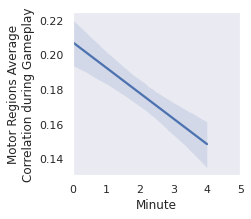

In [94]:
x = expfirst['minute']
y = expfirst['smotorsCorr']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, scatter = False, fit_reg = True)
sns.set(style="darkgrid")
ax.set_xlim([0, 5])
#ax.set_ylim([0.1, 0.2])
ax.set_ylabel('Motor Regions Average\nCorrelation during Gameplay')
ax.set_xlabel('Minute')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})

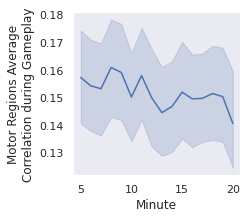

In [95]:
x = expsecond['minute']
y = expsecond['smotorsCorr']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.lineplot(x=x, y=y)
sns.set(style="darkgrid")
#ax.set_xlim([0, 5])
#ax.set_ylim([0.1, 0.2])
ax.set_ylabel('Motor Regions Average\nCorrelation during Gameplay')
ax.set_xlabel('Minute')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})

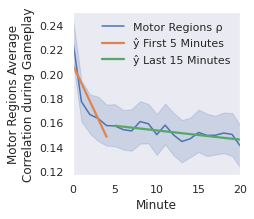

In [96]:
x = groupfil_expmeancorr['minute']
y = groupfil_expmeancorr['smotorsCorr']
f, ax = plt.subplots()
sns.lineplot(x=x, y=y, ax = ax, label = "Motor Region Correlations")
sns.set(style="darkgrid")
#ax.set_xlim([0, 20])
#ax.set_ylim([0.1, 0.2])
ax.set_ylabel('Motor Regions Average\nCorrelation during Gameplay')
ax.set_xlabel('Minute')
ax.grid(False)
x = expfirst['minute']
y = expfirst['smotorsCorr']
sns.regplot(x=x, y=y, ci = None, scatter = False, fit_reg = True, ax = ax, label = "First 5 Minutes")
x = expsecond['minute']
y = expsecond['smotorsCorr']
sns.regplot(x=x, y=y, ci = None, scatter = False, fit_reg = True, ax = ax, label = "Last 15 Minutes")
plt.legend(labels=['Motor Regions ρ','ŷ First 5 Minutes','ŷ Last 15 Minutes'], frameon = False, loc = 'upper right')
ax.set_ylabel('Motor Regions Average\nCorrelation during Gameplay')
ax.set_xlabel('Minute')
sns.set(rc={'figure.figsize':(3,3)})
#plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/smotorregionscorrelationovertime.pdf', bbox_inches='tight') 

In [366]:
filmeancorr = meancorr[~meancorr.groupby(['group'])['normevents'].apply(is_outlier)]

In [390]:
hc_t = stats.ttest_ind(expmeancorr['NormHzmotor2'], restmeancorr['NormHzmotor2'])
hc_t

Ttest_indResult(statistic=-8.419026701713795, pvalue=4.359785849094031e-17)

In [4]:
Corrdf = pd.read_pickle('../data/spikedatacorrsall1000ms.pkl')
Corrdf['cell_type']= "Mouse"
Corrdf['cell_type']= np.where((Corrdf['tag'].str.contains('GFP', case = False) | Corrdf['tag'].str.contains('ngn2', case = False) |
                        (Corrdf['tag'].str.contains('tdt', case = False))), "Human", Corrdf['cell_type'])

In [5]:
cutmeancorr = Corrdf
cutmeancorr = Corrdf[Corrdf.minute  > 0]
cutmeancorr['celltype'] = 0
cutmeancorr['celltype'] = np.where((cutmeancorr['group'] == 0), "Mouse", "Human")
#cutmeancorr['group'] = np.where((cutmeancorr['group'] == 0) | (cutmeancorr[("group")] == 2), 1, cutmeancorr['group'])
#cutmeancorr['group'] = np.where((cutmeancorr['group'] == 3) & (cutmeancorr['minute'] > 10), 4, cutmeancorr['group'])
cutmeancorr['minute'] = np.where((cutmeancorr['group'] == 1), (cutmeancorr['minute']+10), cutmeancorr['minute'])
cutmeancorr = cutmeancorr[cutmeancorr.group  != 4]

#cutmeancorr['minute'] = np.where((cutmeancorr['session'] == '1'), (cutmeancorr['minute']+20), cutmeancorr['minute'])
#cutmeancorr['minute'] = np.where((cutmeancorr['session'] == '2'), (cutmeancorr['minute']+30), cutmeancorr['minute'])
#cutmeancorr['minute'] = np.where((cutmeancorr['session'] == '3'), (cutmeancorr['minute']+10), cutmeancorr['minute'])
#cutmeancorr['minute'] = np.where((cutmeancorr['session'] == '4'), (cutmeancorr['minute']+60), cutmeancorr['minute'])
cutmeancorr['normevents'] = cutmeancorr['events'] - (((cutmeancorr['NormHzSensory']) + (cutmeancorr['NormHzmotor1']) + (cutmeancorr['NormHzmotor2']))/3)


meancorr = cutmeancorr.groupby(['cell_type', 'chip_id', 'date', 'session', 'minute']).mean()
meancorr = meancorr.reset_index()
#meancorr = meancorr[meancorr.NormHzSensory  > 0]
expmeancorr = meancorr[meancorr.group  != 3]
restmeancorr = meancorr[meancorr.group  == 3]
meancorr['events'] = meancorr['events'] * 100

In [6]:
hc_t = stats.ttest_ind(expmeancorr['normevents'], restmeancorr['normevents'])
hc_t

Ttest_indResult(statistic=10.015430344019714, pvalue=1.70155919265355e-23)

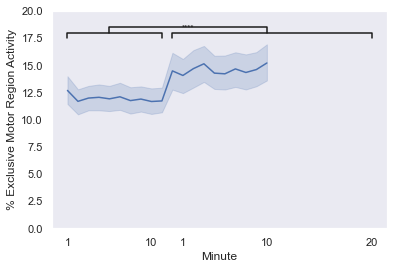

In [7]:

x = meancorr['minute']
y = meancorr['events']
#hue = data['half']
sns.set(style="darkgrid")
ax = sns.lineplot(data=meancorr, x=x, y=y, palette="Set2")
#ax.set_xticks(x_pos)
plt.xticks([1,9,12,20,30],['1','10','1','10','20'])
#ax.set_xticklabels(("STIM", "SIL", "NF", "RST"))
#ax.set_title('Pong Performance By \n Condition & Time')
ax.set_ylabel('% Exclusive Motor Region Activity')
ax.set_xlabel('Minute')
ax.grid(False)

plt.plot([5, 5, 20, 20], [18, 18.5, 18.5, 18], lw=1.5, c='k')
plt.text(12.5, 18.2, "****", ha='center', va='bottom', color='k', fontsize=8)

plt.plot([1, 1, 10, 10], [17.5, 18, 18, 17.5], lw=1.5, c='k')

plt.plot([11, 11, 30, 30], [17.5, 18, 18, 17.5], lw=1.5, c='k')

ax.set_ylim([0, 20])
sns.set(rc={'figure.figsize':(3,3)})